# On Analyzing Real World Time Series for Forecasting Stock Data - Shanghai Composite Index

- PAPER: [Financial Time Series Forecasting with the Deep Learning Ensemble Model](https://www.mdpi.com/2227-7390/11/4/1054) by He K., et al. 2023

## TODOs

In [1]:
import os
import sys
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../framework_for_time_series_data/tslearn/'))

from collections import namedtuple
from data_loader import build_stock_uts
from ts_models import Model, ARMA, EvaluationMetric
from time_series import TimeSeriesFactory, UnivariateTimeSeries

## Stock Data Analysis with Forecasts

1. Load Raw Data
2. Plot Raw Data
3. Get Descriptive Statistics (ie: mean, median, range, etc) of Raw Data
4. Check Stationarity of Raw Data
5. Plot Autocorrelation and Partial Autocorrelation of Raw Data
6. Get Returns Data
7. Plot Returns Data
8. Get Descriptive Statistics (ie: mean, median, range, etc) of Returns Data
9. Check Stationarity of Returns Data
10. Plot Autocorrelation and Partial Autocorrelation of Returns Data
11. Split Returns Data
12. Initialize Autoregressive `AR(p)` Model
13. Predict Forecasts for Returns Data
14. Plot Actual Forecasts vs Predicted Forecasts for Returns Data
24. Follow-up

### Load Raw Data

In [2]:
# Only grab stocks whose data is available for the entire time period
start_date, end_date = "2010-01-04", "2020-01-30"
Stock = namedtuple("Stock", ["symbol", "name"])
stocks = [
    ("000001.SS", "Shanghai Composite Index")
]
independent_variable = "Close"
# frequency = 
stocks = [Stock(*s) for s in stocks]
stocks = {s.symbol: build_stock_uts(s.symbol, s.name, independent_variable, start_date=start_date, end_date=end_date, frequency='1d') for s in stocks}

[*********************100%***********************]  1 of 1 completed


In [3]:
values_cols = list(stocks.keys())
stock_mvts = TimeSeriesFactory.create_time_series(
    time_col="date",
    time_values=stocks[values_cols[0]].data.index,
    values_cols=values_cols,
    values=[stock.get_series() for stock in stocks.values()]
)

In [4]:
stock_symbol = '000001.SS'
stock_of_interest = stocks[stock_symbol]
type(stock_of_interest), stock_of_interest

(time_series.UnivariateTimeSeries, UnivariateTimeSeries(Close))

In [5]:
stock_series = stock_of_interest.get_series()
stock_series

array([3243.76000977, 3282.17895508, 3254.21508789, ..., 3052.13989258,
       3060.75488281, 2976.52807617])

In [6]:
stock_df = stock_of_interest.get_as_df()
stock_df

,Close
Date,
2010-01-04,3243.760010
2010-01-05,3282.178955
2010-01-06,3254.215088
2010-01-07,3192.775879
2010-01-08,3195.997070
...,...
2020-01-17,3075.496094
2020-01-20,3095.787109
2020-01-21,3052.139893


### Plot Raw Data

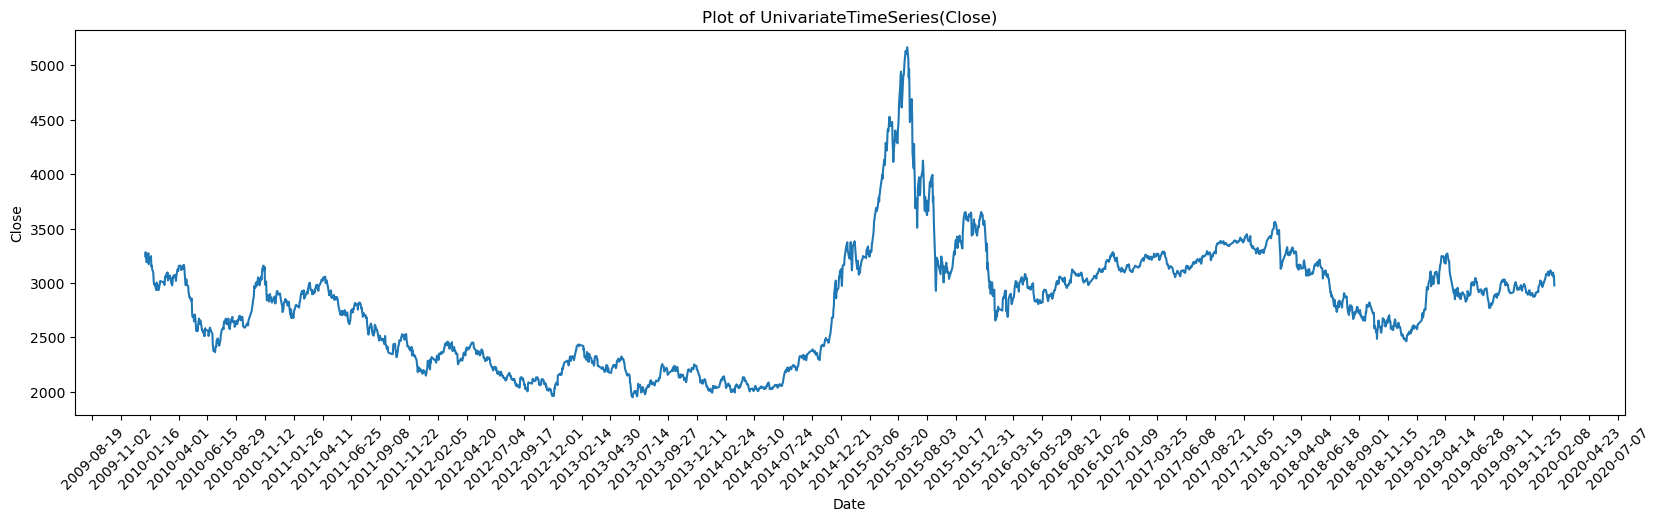

In [7]:
stock_of_interest.plot(tick_skip=75)

### Get Descriptive Statistics of Raw Data

In [8]:
stock_of_interest.get_statistics()

,Close
count,2443.000000
mean,2801.352097
std,529.728447
min,1950.011963
25%,2345.647461
50%,2859.918945
75%,3128.335083
max,5166.350098


In [9]:
stock_of_interest.range_skewness_kurtosis()

{'Range': Close    3216.338135
 dtype: float64,
 'Skewness': Close    0.748415
 dtype: float64,
 'Kurtosis': Close    1.530622
 dtype: float64}

### Check Stationarity of Raw Data

- With financial data, we expect it to be non-stationary.
    - Can we verify this non-stationary with plotting the Autocorrelation?

In [10]:
stock_of_interest.stationarity_test(stock_df)

ADF Statistic: -2.208837
p-value: 0.203054 > 0.05 , so accept the null-hypothesis as the TS is non-stationary
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [27]:
stock_of_interest.independence_test(stock_df)

BDS Statistic: 146.655997
p-value: 0.000000 < 0.05 , so reject null-hypothesis as the differenced TS is independent and i.i.d.


### Plot Autocorrelation and Partial Autocorrelation of Raw Data

In [11]:
# stock_of_interest.plot_autocorrelation(50)

- What is the above telling us?

In [12]:
# stock_of_interest.plot_partial_autocorrelation(35)

- What is the above telling us?

### Get Returns Data

In [13]:
len(stock_of_interest.get_series()), stock_of_interest.get_series()

(2443,
 array([3243.76000977, 3282.17895508, 3254.21508789, ..., 3052.13989258,
        3060.75488281, 2976.52807617]))

In [14]:
stock_returns = stock_of_interest.data_augment_for_returns()
stock_returns

UnivariateTimeSeries(Returns)

In [16]:
# threshold_acorrs_for_returns = stock_returns.autocorrelation_with_threshold()
# len(threshold_acorrs_for_returns), threshold_acorrs_for_returns

- What if we adjust the threshold?

In [17]:
stock_returns_df = stock_returns.get_as_df()
stock_returns_df

,Returns
Date,
2010-01-05,0.011844
2010-01-06,-0.008520
2010-01-07,-0.018880
2010-01-08,0.001009
2010-01-11,0.005242
...,...
2020-01-17,0.000460
2020-01-20,0.006598
2020-01-21,-0.014099


### Plot Returns

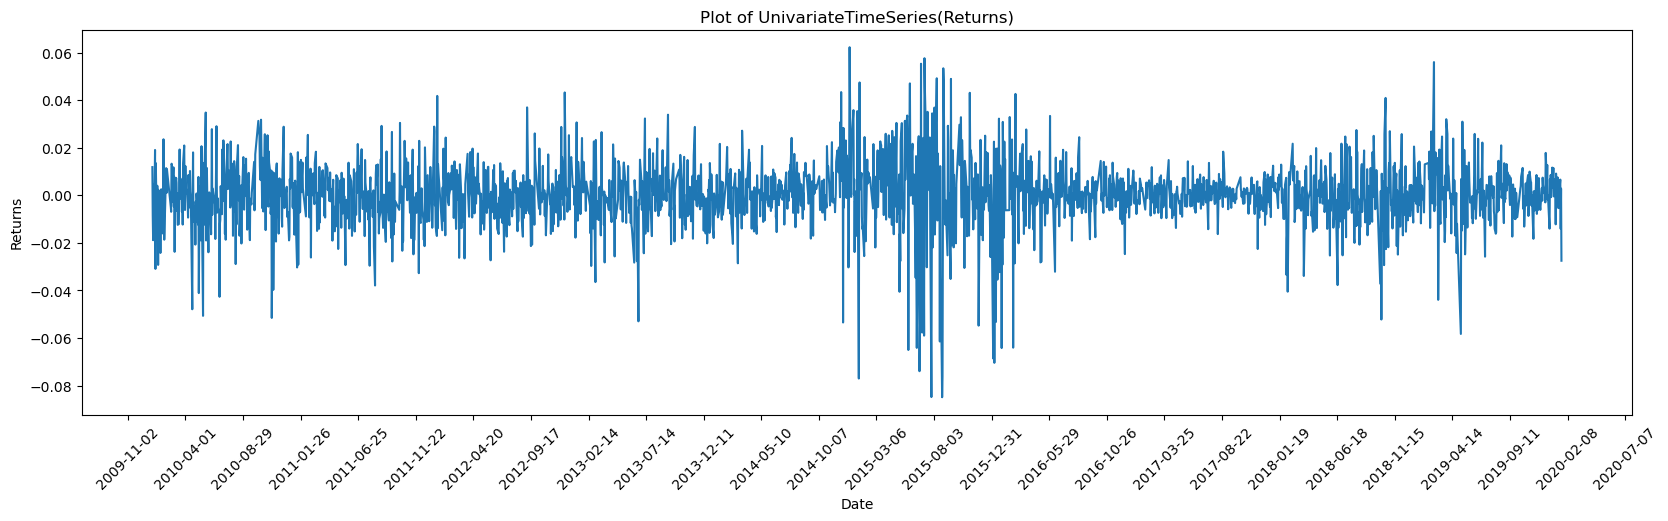

In [18]:
stock_returns.plot(tick_skip=150)

- Returns seem to have constant mean and constant although there are a few wide spread mean values between ~2014-10-07 to 2016-05-29 and ~2017-08-22 to 2019-04-14.

### Get Descriptive Statistics of Returns Data

In [19]:
stock_returns.get_statistics()

,Returns
count,2442.000000
mean,0.000057
std,0.013553
min,-0.084909
25%,-0.005829
50%,0.000499
75%,0.006320
max,0.062260


In [20]:
stock_returns.range_skewness_kurtosis()

{'Range': Returns    0.147169
 dtype: float64,
 'Skewness': Returns   -0.738703
 dtype: float64,
 'Kurtosis': Returns    5.648276
 dtype: float64}

### Check Stationarity of Returns Data

In [ ]:
stock_returns.stationarity_test(stock_returns_df)

In [ ]:
stock_returns.independence_test(stock_returns_df)

### Plot Autocorrelation and Partial Autocorrelation of Returns Data

In [ ]:
stock_returns.plot_autocorrelation(50)

- Lag exponentially decays at 1, thus we'd only want to use lag 2?

In [ ]:
stock_returns.plot_partial_autocorrelation(50)

### Initialize Autoregressive AR(p) Model

- How to determine the proper lag value? Look at the Partial ACor plot.

In [ ]:
days_to_forecast = [10, 366]

for i in range(len(days_to_forecast)):
    total_days = len(stock_returns)
    print(f'Total days {total_days}')
    
    test_days = days_to_forecast[i]
    print(f'Test days considered {test_days}')
    
    training_days = total_days - test_days
    print(f'Training days considered {training_days}\n')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

- `threshold_acorrs` vs `threshold_acorrs_for_returns`

In [ ]:
train_labels = []
true_labels = []

# New model for each new X day forecast
trained_ar_models = []
trained_ma_models = [] 

for i in range(len(days_to_forecast)):
    print(f'{days_to_forecast[i]} Day Forecast')
    
    train_data = stock_returns.get_as_df()[:-days_to_forecast[i]]
    print(f'Length of training days {len(train_data)}')
    # print(train_data)
    train_labels.append(train_data)
    
    true_data = stock_returns.get_as_df()[-days_to_forecast[i]:]
    print(f'Length of testing days {len(true_data)}')
    # print(true_labels) 
    true_labels.append(true_data)
    
    # create objects from the AR() and MA() classes, respectively
    ar_model_class = AR()

    # call functions to train our AR and MA models, respectively
    trained_ar_model = ar_model_class.train_ar_model(train_data, threshold_acorrs)
    
    # can't use threshold_acorrs_for_returns because it's empty 
    # trained_ar_model = ar_model_class.train_ar_model(train_data, threshold_acorrs_for_returns)
    print(f'{days_to_forecast[i]} Day Forecast Model: {trained_ar_model}\n')
    
    trained_ar_models.append(trained_ar_model)

In [ ]:
# threshold_acorrs[:50]

### Predict + Plot Actual Forecasts vs Predicted Forecasts for Raw Data

In [ ]:
# New forecasting model for each new X day forecast
ar_forecasts = []

for i in range(len(trained_ar_models)):
    ar_forecast = ar_model_class.predict(trained_ar_models[i], train_labels[i], true_labels[i])
    ar_forecasts.append(ar_forecast)
    # print(f'{days_to_forecast[i]} Day Forecasts: \n{ar_forecast}')
    
    EvaluationMetric.plot_forecast(train_labels[i], true_labels[i], ar_forecast)
    EvaluationMetric.plot_forecast_only(true_labels[i], ar_forecast)
    
    print("\n")

In [ ]:
for i in range(len(ar_forecasts)):
    ar_forecast_for_specific_model = ar_forecasts[i]
    # print(i, type(ar_forecast_for_specific_model), "\n", ar_forecast_for_specific_model)
    
    # Get evaluation metrics
    EvaluationMetric.eval_mse(true_labels[i], ar_forecast_for_specific_model)
    
    EvaluationMetric.eval_rmse(true_labels[i], ar_forecast_for_specific_model)
    print()

### Follow-up
- What can we determine from this?
    - 10 Day Forecast:
        - Actual Forecast (with the real prices): We'd want to buy on 2020-12-28 and sell on 2020-12-28.
        - Predicted Forecast (`AR` model): We'd want to by on 2020-12-18 and sell on 2020-12-21.
        - Predicted Forecast (`AR` model): We'd want to by on 2020-12-24 and sell on 2020-12-28.
- Can we do better? or Why might this be wrong?
    - We only consider AR. The data does NOT have multicollinearity [some of the lagged variables provide redundant information] bc we differenced to get the returns.
    - Our MSE and RMSE are lower compared to our `AR` when NOT differencing.
- What to consider?